# Phase 3 - Next steps and some deployment options

- Detailed information including Business Requirements can be seen in Phases 0, 1 and 2


### Dataset
the dataset used in this process can be accessed trought IBM website below

https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

In [1]:
library(tidyverse)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.0.0     v purrr   0.2.5
v tibble  1.4.2     v dplyr   0.7.6
v tidyr   0.8.1     v stringr 1.3.1
v readr   1.1.1     v forcats 0.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


In [7]:
# Load the Dataset - Customer Churn
df <- readr::read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df %>% head(3)


Parsed with column specification:
cols(
  .default = col_character(),
  SeniorCitizen = col_integer(),
  tenure = col_integer(),
  MonthlyCharges = col_double(),
  TotalCharges = col_double()
)
See spec(...) for full column specifications.


customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### The revenue associated with customers that finish the contract is quite high associated with normal customers

#### Note
- Next periods will not have revenue associated with customer churners, so the impact in the revenue will be higher month after month

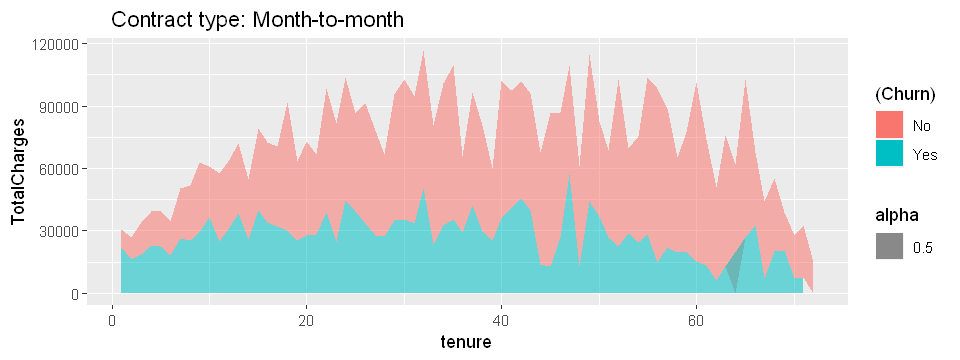

In [8]:
options(repr.plot.width = 8, repr.plot.height = 3)
## Exclude Customer_ID and apply 0 to Total Charges -> First Bill
df[is.na(df$TotalCharges) & df$tenure==0 , ]['TotalCharges'] <- 0
# df$customerID <- NULL

df %>% filter(Contract=='Month-to-month') %>%   
  group_by(Churn, tenure, Contract) %>% 
  summarise( MonthlyCharges=sum(MonthlyCharges), 
             TotalCharges=sum(TotalCharges))  %>% 
  qplot(data=. ,x=tenure, y=TotalCharges, 
        geom='area', alpha=0.5, fill=(Churn),
        main='    Contract type: Month-to-month') 



## The main target to fix and associated with graphic above is

- Decrease the green area (revenue associated with customer churners) and increase the red area (current customers)

In [10]:

### JUST TO REMEMBER, THE MACHINE LEARNING MODEL WAS SAVED FOR FUTURE USE IN PHASE 2

## Save the model -> 80% of accuracy
## xgb.save(fit.xgb, '../data/xgb_model_acc_80p.model')

## obs. to load the model later just run the command below
## model_xgb <- xgb.load('./data/xgb_model_acc_80p.model')

## Deployment options

The deployment of the model could be done in many ways, such as

- Apply the model to a new customer base, identify possible churners and start one marketing campaighn to suggest other contract options for the customer


- Integrate the model with the CRM and Call Center systems for a better interaction with the customer when the next call of these possible churners occurs


- One 3rd option could be an application to provide small discounts for specific services and integrated with billing systems to try to maintain customer loyalty


- Setup one major project to implement all actions above ... and so on....


# Summary and final comments

- These 3 phases could be deployed in just one Notebook, but the idea was to show a common data science project pipeline
